In [467]:
#importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#matplotlib inlinez
mpl.style.use('ggplot')

In [468]:
#importing dataset
car=pd.read_csv('/content/quikr_car.csv')

In [469]:
car.rename(columns={'Kms driven': 'Kms_driven', 'Company name': 'company', 'Name of car': 'name'}, inplace=True)

In [470]:
car.head()

,name,company,Year,Price,Kms_driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


In [471]:
car.shape

(892, 6)

In [472]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   Year        892 non-null    object
 3   Price       892 non-null    object
 4   Kms_driven  840 non-null    object
 5   Fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [473]:
#creating backup copy
backup=car.copy()

## Data Cleaning

In [474]:
#year has many non-year values
car['Year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: Year, Length: 892, dtype: object

In [475]:
car=car[car['Year'].str.isnumeric()]

In [476]:
#year is in object . change to integer
car['year']=car['Year'].astype(int)

In [477]:
car['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [478]:
#Price has Ask for Price
car=car[car['Price']!='Ask For Price']

In [479]:
#Price has commas in its prices and is in object
car['Price']=car['Price'].str.replace(',','').astype(int)

In [480]:
# car['Price']

In [481]:
car['Kms_driven']

0         45,000
1             40
3         28,000
4         36,000
6         41,000
         ...    
886    1,32,000 
888       27,000
889       40,000
890       Petrol
891       Petrol
Name: Kms_driven, Length: 819, dtype: object

In [482]:
#kms_driven has object values with kms at last
car['kms_driven']=car['Kms_driven'].str.split().str.get(0).str.replace(',','')

In [483]:
#It has  two rows have 'Petrol' in them
car=car[car['kms_driven'].str.isnumeric()]

In [484]:
car['kms_driven']=car['kms_driven'].astype(int)

<ipython-input-484-de01a420cef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].astype(int)


In [485]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: int64

In [486]:
car['Fuel_type'].isna().sum()

1

In [487]:
car=car[~car['Fuel_type'].isna()]

In [488]:
car.shape

(816, 8)

In [489]:
car['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [490]:
#Company does not need any cleaning now. Changing car names. Keeping only the first three words
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [491]:
#Resetting the index of the final cleaned data
car=car.reset_index(drop=True)

# Cleaned Data

In [492]:
car

,name,company,Year,Price,Kms_driven,Fuel_type,year,kms_driven
0,Hyundai Santro Xing,Hyundai,2007,80000,"45,000",Petrol,2007,45000
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,2006,40
2,Hyundai Grand i10,Hyundai,2014,325000,"28,000",Petrol,2014,28000
3,Ford EcoSport Titanium,Ford,2014,575000,"36,000",Diesel,2014,36000
4,Ford Figo,Ford,2012,175000,"41,000",Diesel,2012,41000
...,...,...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,"50,000",Petrol,2011,50000
812,Tata Indica V2,Tata,2009,110000,"30,000",Diesel,2009,30000
813,Toyota Corolla Altis,Toyota,2009,300000,"1,32,000",Petrol,2009,132000
814,Tata Zest XM,Tata,2018,260000,"27,000",Diesel,2018,27000


In [493]:
car.to_csv('Cleaned_Car_data.csv')

In [494]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   Year        816 non-null    object
 3   Price       816 non-null    int64 
 4   Kms_driven  816 non-null    object
 5   Fuel_type   816 non-null    object
 6   year        816 non-null    int64 
 7   kms_driven  816 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 51.1+ KB


In [495]:
car.describe(include='all')

,name,company,Year,Price,Kms_driven,Fuel_type,year,kms_driven
count,816,816,816,8.160000e+02,816,816,816.000000,816.000000
unique,254,25,21,NaN,248,3,NaN,NaN
top,Maruti Suzuki Swift,Maruti,2015,NaN,"45,000",Petrol,NaN,NaN
freq,51,221,111,NaN,30,428,NaN,NaN
mean,NaN,NaN,NaN,4.117176e+05,NaN,NaN,2012.444853,46275.531863
std,NaN,NaN,NaN,4.751844e+05,NaN,NaN,4.002992,34297.428044
min,NaN,NaN,NaN,3.000000e+04,NaN,NaN,1995.000000,0.000000
25%,NaN,NaN,NaN,1.750000e+05,NaN,NaN,2010.000000,27000.000000
50%,NaN,NaN,NaN,2.999990e+05,NaN,NaN,2013.000000,41000.000000
75%,NaN,NaN,NaN,4.912500e+05,NaN,NaN,2015.000000,56818.500000


In [496]:
car=car[car['Price']<6000000]

In [497]:
#Checking relationship of Company with Price
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [498]:
#Visualization
import seaborn as sns

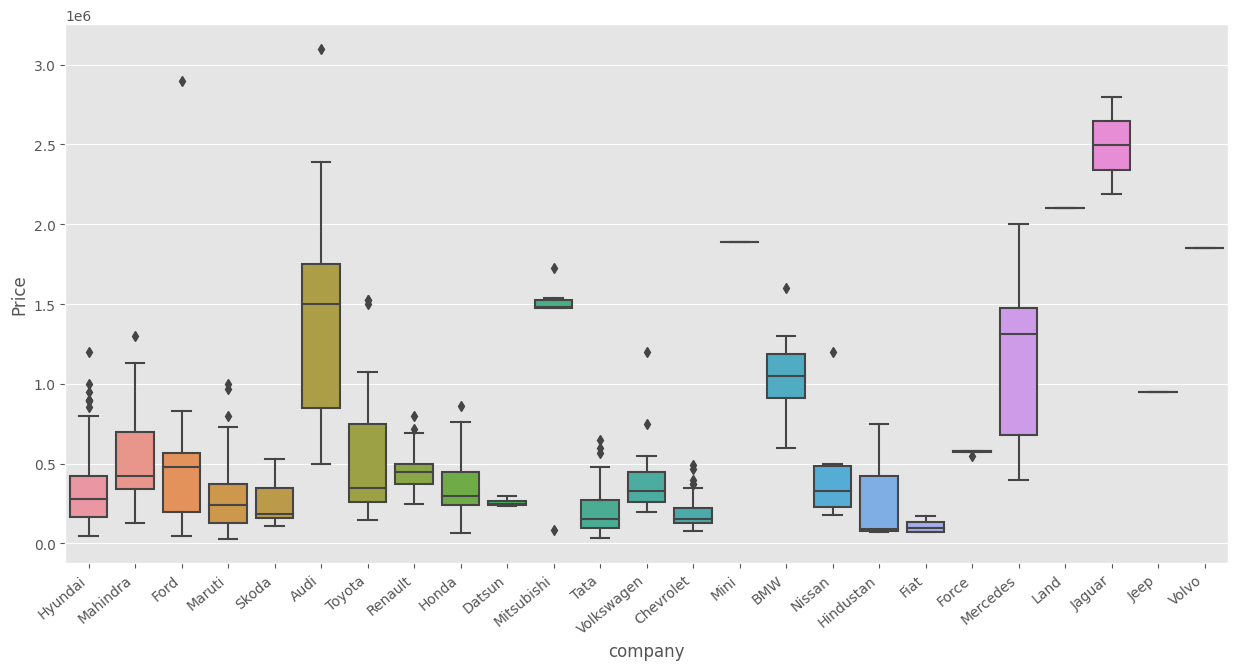

In [499]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed

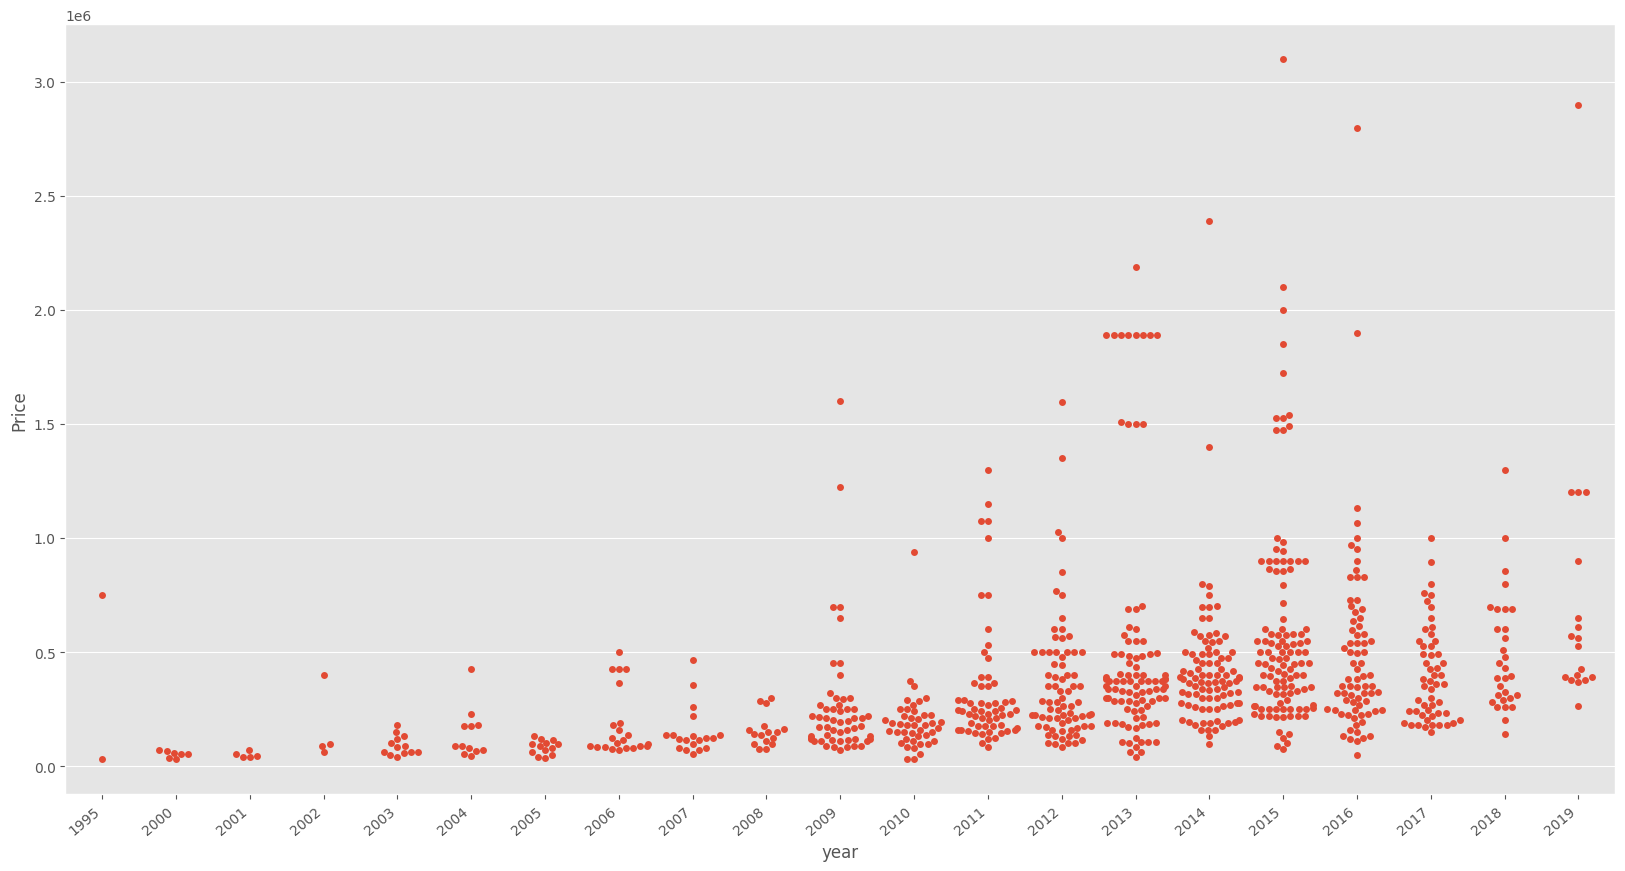

In [500]:
#Checking relationship of Year with Price
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

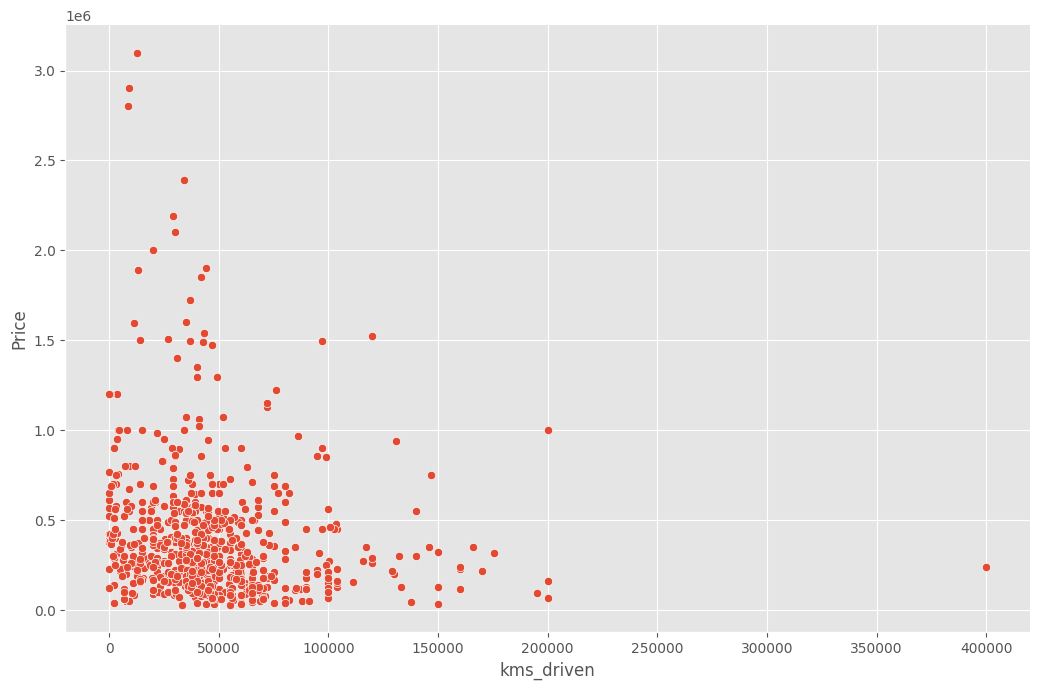

In [501]:
#Checking relationship of kms_driven with Price
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

In [502]:
car['Price']

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int64

<Axes: xlabel='Fuel_type', ylabel='Price'>

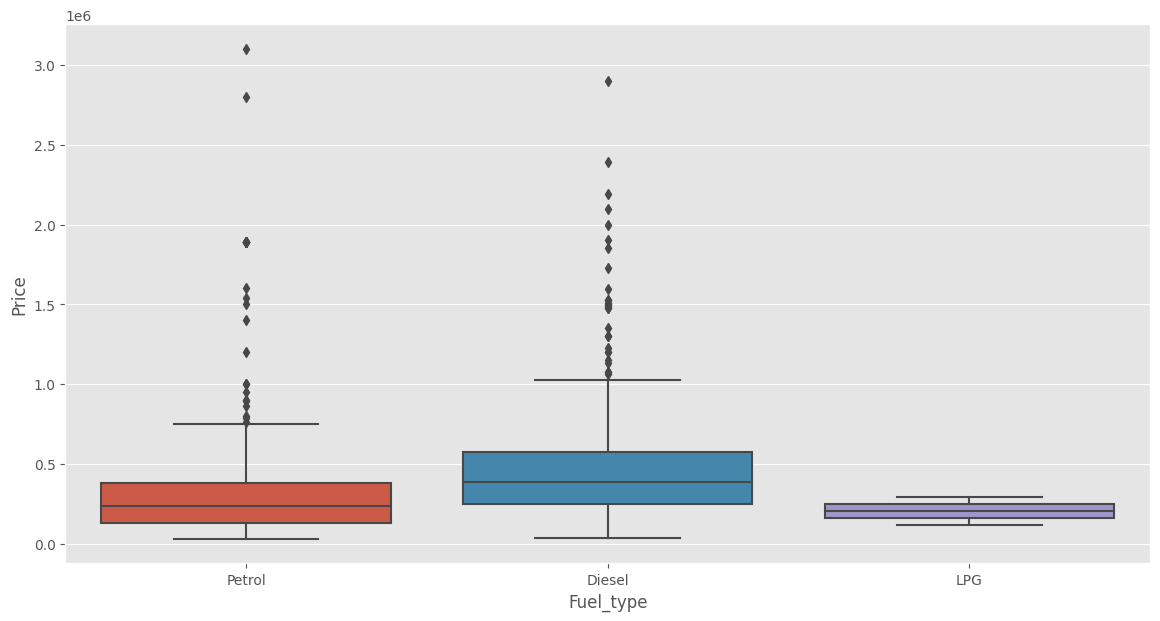

In [503]:
#Checking relationship of Fuel Type with Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_type',y='Price',data=car)

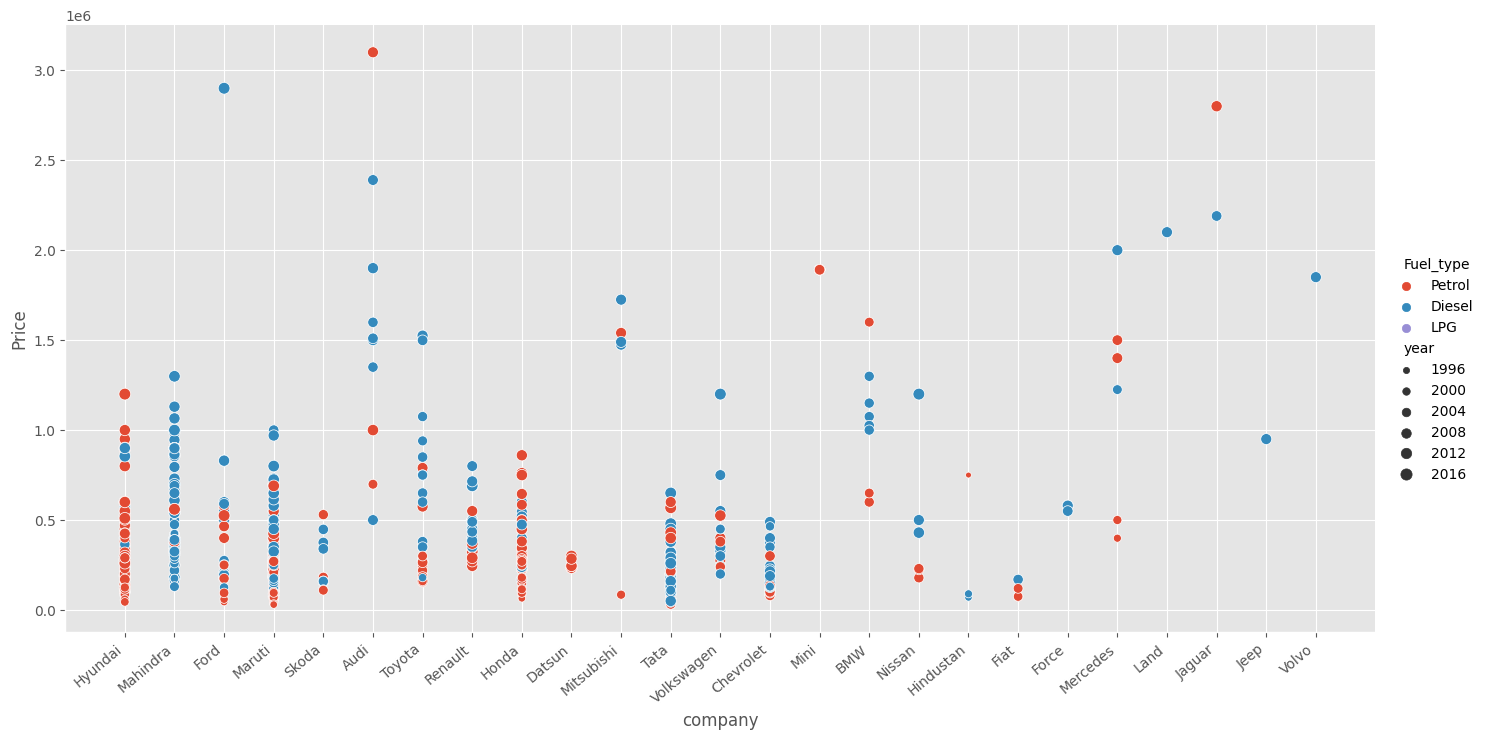

In [504]:
#Relationship of Price with  FuelType,Year and company mixed
ax=sns.relplot(x='company',y='Price',data=car,hue='Fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [505]:
# Extracting Training Data
X=car[['name','company','year','kms_driven','Fuel_type']]
y=car['Price']

In [506]:
X

,name,company,year,kms_driven,Fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [507]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int64

In [508]:
print(X.shape)
print(y.shape)

(815, 5)
(815,)


In [509]:
y.shape

(815,)

In [510]:
#Applying Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [511]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [512]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [513]:
#creating an OnehotEncoder object to contain all the possible categories
ohe=OneHotEncoder()
ohe.fit(X[['name','company','Fuel_type']])

OneHotEncoder()

In [514]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','Fuel_type']),
                                    remainder='passthrough')


In [515]:
#Linear Regression model
lr=LinearRegression()

In [516]:
#Decision Tree Model
DT=DecisionTreeRegressor()

In [517]:
#Making a pipeline for Linear Regression
pipe=make_pipeline(column_trans,lr)

In [518]:
#Making a pipeline for Logistic  Regression
pipe1=make_pipeline(column_trans,DT)

In [519]:
#Fitting the model  for Linear Regressiong
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'Fuel_type'])])),
                ('linearregression', LinearRegression())])

In [520]:
#Fitting the model  for Logistic Regressiong
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'Fuel_type'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [521]:
#y_pred for Linear Regression
y_pred=pipe.predict(X_test)

In [522]:
#y_pred for Logistic Regression
y_pred1=pipe1.predict(X_test)

In [523]:
#checking R2 score for linear Regression
r2_score(y_test,y_pred)

0.8419883873040321

In [524]:
#checking R2 score for Decision Tree Regression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("R2 score",r2_score(y_test,y_pred1))
# r2_score(y_test,y_pred1)

MAE 93726.63599182003
MSE 33023529039.554874
R2 score 0.754227654337488


In [525]:
#Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score
#For linear Regression
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [526]:
np.argmax(scores)

302

In [527]:
scores[np.argmax(scores)]

0.8991190499074018

## DecisionTree

In [528]:
#Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score
#For Decision Tree Regresson
scores1=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    DT=DecisionTreeRegressor()
    pipe1=make_pipeline(column_trans,DT)
    pipe1.fit(X_train,y_train)
    y_pred1=pipe1.predict(X_test)
    scores1.append(r2_score(y_test,y_pred1))

In [529]:
np.argmax(scores1)

507

In [530]:
scores1[np.argmax(scores1)]

0.9263359009198899

In [531]:
#Prdicting with Linear Regression
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430382.81414542])

In [532]:
#Prdicting with DecisonTree
pipe1.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([650000.])

## Best Model of Linear Regression

In [533]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [534]:
np.argmax(scores)

302

In [535]:
scores[np.argmax(scores)]

0.8991190499074018

In [536]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
# lr=LinearRegression()
# pipe=make_pipeline(column_trans,lr)
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# r2_score(y_test,y_pred)

In [537]:
#Prediction with linear Regression
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','Fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430382.81414542])

In [538]:
#Predicting with decision Tree
pipe1.predict(pd.DataFrame(columns=['name','company','year','kms_driven','Fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([650000.])

## Evaluation Matrix Linear Regression


In [539]:
#Evoluting Matrix for linear Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 111402.36112611805
MSE 33168497771.500023
R2 score 0.7435799121016728


In [540]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("R2 score",r2_score(y_test,y_pred1))

MAE 70995.84146341463
MSE 15637722732.182926
R2 score 0.8791073908399478
